In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df = df.fillna(method='ffill')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10 )
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

E:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


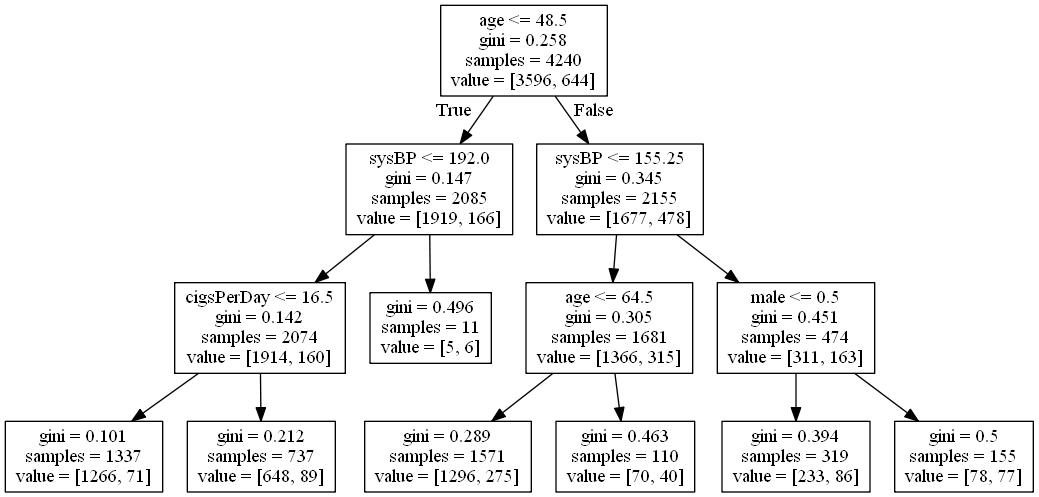

In [7]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.7720125786163522


## Hyperparameter Tuning
### Grid Search

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
dt = DecisionTreeClassifier()

params = {'max_depth' : [2,3,4,5,6,7,8],
        'min_samples_split': [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}

For Grid search we considered max_depth between 2 to 8, min_samples_split between 2 to 10 and min_samples_leaf between 1 to 10. The best parameter for the decision was found to be 2, 5 and 2.

Now we will build decision tree using these hyperparameters.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=1)

In [13]:
dt = DecisionTreeClassifier(**gsearch.best_params_)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8460242587601078
Accuracy of Decision Tree-Test:  0.8529874213836478


In [14]:
print('AUC of Decision Tree-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Decision Tree-Test: ', roc_auc_score(y_test, y_prob))

AUC of Decision Tree-Train:  0.6691859973665107
AUC of Decision Tree-Test:  0.6800931516301536


### Hyperparameter Tuning - Random Search

In [15]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : sp_randint(2,10),
        'min_samples_split': sp_randint(2,50),
        'min_samples_leaf': sp_randint(1,20),
         'criterion':['gini', 'entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3, 
                                 random_state=1)

rand_search.fit(X, y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 3}


In [16]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8460242587601078
Accuracy of Decision Tree-Test:  0.8529874213836478


In [17]:
print('AUC of Decision Tree-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Decision Tree-Test: ', roc_auc_score(y_test, y_prob))

AUC of Decision Tree-Train:  0.6786345767899142
AUC of Decision Tree-Test:  0.6958451415756919


## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))


Accuracy of Random Forest-Train:  0.9797843665768194
Accuracy of Random Forest-Test:  0.845125786163522


In [19]:
print('AUC of Random Forest-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest-Test: ', roc_auc_score(y_test, y_prob))

AUC of Random Forest-Train:  0.9994444575160323
AUC of Random Forest-Test:  0.6364055299539171


We noticed that there is large difference between the model performance Train and Test. Hence, we will tune the Hyperparamter and check the results.

### Hyperparameter Tuning of Random Forest

In [20]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,25),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 10),
    'min_samples_split': sp_randint(2,20),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': sp_randint(2,15)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_rfc.fit(X, y)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 24}


In [21]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.8601752021563343
Accuracy of Random Forest-Test:  0.8545597484276729


In [22]:
print('AUC of Random Forest-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest-Test: ', roc_auc_score(y_test, y_prob))

AUC of Random Forest-Train:  0.8311142134346293
AUC of Random Forest-Test:  0.711643953769191


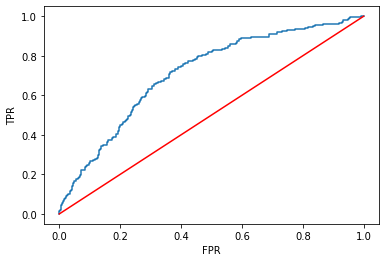

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## k-NN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [28]:
knn.fit(X_trains, y_train)

y_pred_train = knn.predict(X_trains)
y_prob_train = knn.predict_proba(X_trains)[:,1]

y_pred = knn.predict(X_tests)
y_prob = knn.predict_proba(X_tests)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of kNN-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN-Test: ', accuracy_score(y_pred, y_test))

Accuracy of kNN-Train:  0.8655660377358491
Accuracy of kNN-Test:  0.8427672955974843


In [29]:
print('AUC of kNN-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN-Test: ', roc_auc_score(y_test, y_prob))

AUC of kNN-Train:  0.8658990158837222
AUC of kNN-Test:  0.6354715493235418


In [34]:
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,20),
        'p': sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions=params,
                                 cv=3, random_state=1)
rand_search_knn.fit(Xs, y)
print(rand_search_knn.best_params_)

{'n_neighbors': 10, 'p': 4}


In [35]:
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_trains, y_train)

y_pred_train = knn.predict(X_trains)
y_prob_train = knn.predict_proba(X_trains)[:,1]

y_pred = knn.predict(X_tests)
y_prob = knn.predict_proba(X_tests)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.8514150943396226
Accuracy of Random Forest-Test:  0.8522012578616353


In [36]:
print('AUC of kNN-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN-Test: ', roc_auc_score(y_test, y_prob))

AUC of kNN-Train:  0.807019355535861
AUC of kNN-Test:  0.6496192611942138


## Stacking Algorithms

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

In [69]:
clf = VotingClassifier(estimators=[('lr',lr), ('rfc',rfc), ('knn',knn)], 
                       voting='soft')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [70]:
print('Accuracy of Stacked Algos-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Stacked Algos-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.852088948787062
Accuracy of Random Forest-Test:  0.8537735849056604


In [72]:
print('AUC of Stacked Algos: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Stacked Algos: ', roc_auc_score(y_test, y_prob))

AUC of Stacked Algos:  0.7985284877828582
AUC of Stacked Algos:  0.7360309519702308


In [76]:
clf = VotingClassifier(estimators=[('lr',lr), ('rfc',rfc), ('knn',knn)], 
                       voting='soft', weights=[2,3,1])
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [77]:
print('Accuracy of Stacked Algos-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Stacked Algos-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Stacked Algos-Train:  0.8534366576819407
Accuracy of Stacked Algos-Test:  0.8561320754716981


In [78]:
print('AUC of Stacked Algos: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Stacked Algos: ', roc_auc_score(y_test, y_prob))

AUC of Stacked Algos:  0.8011323480841845
AUC of Stacked Algos:  0.7393725818773258
